In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from math import sqrt
from unidecode import unidecode
import os
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib
...

Ellipsis

Configuracion Especial de Pandas

In [26]:
# Elimina los limites para mostrar columnas en Pandas
pd.set_option('display.max_columns', None)

## Comprensión del Problema

- Motivados a las necesidades de mantener una alimentación saludable, plantea realizar una aplicacion para recomendar Alimentos.  en este sentido se han recopilado 5 archivos .csv los cuales contienen alimentos con sus caracteristicas proteicas y de vitaminicas.
- Se plantea utilizar el algoritmo NearestNeighbours para clusterizar el dataset por similitudes y luego utilizarlo en la aplicación.

## Carga de datos
Se Cargan todos los archivos que se utilizaran y se compilan en un solo Archivo para iniciar el proceso EDA

In [27]:
# Get the path of the current Python file
current_dir = os.getcwd()

# Get the path of the sources directory
sources_dir = os.path.join(os.path.dirname(current_dir), 'sources')

# Load the CSV files
data_1 = pd.read_csv(os.path.join(sources_dir, 'FOOD-BEBIDAS.csv'))
data_2 = pd.read_csv(os.path.join(sources_dir, 'FOOD-COMUNES.csv'))
data_3 = pd.read_csv(os.path.join(sources_dir, 'FOOD-FRUTAS.csv'))
data_4 = pd.read_csv(os.path.join(sources_dir, 'FOOD-PESCADOS.csv'))
data_5 = pd.read_csv(os.path.join(sources_dir, 'FOOD-POSTRES.csv'))

# Compile the dataframes
data_compilada = pd.concat([data_1, data_2, data_3, data_4, data_5], ignore_index=True)
data_compilada

,Unnamed: 0.1,Unnamed: 0,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium,Water,Vitamin A,Vitamin B1,Vitamin B11,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,0,0,eggnog,224,10.6,6.600,3.300,0.500,20.4,20.400,11.600,0.0,149.9,0.100,209.7,0.1,0.074,0.020,0.006,0.500,0.3,1.100,0.100,3.8,0.055,0.500,0.011,330.200,0.051,0.500,48.3,0.024,276.90,419.1,0.094,1.200,377.200
1,1,1,beer light,96,0.0,0.000,0.000,0.000,5.4,0.300,0.800,0.0,0.0,0.095,313.1,0.0,0.083,0.079,0.000,0.069,1.3,0.067,0.100,0.0,0.000,0.000,0.000,13.200,0.095,0.014,16.5,0.094,39.60,69.3,0.077,0.044,19.456
2,2,2,beer budweiser,12,0.0,0.000,0.000,0.000,0.9,0.000,0.100,0.0,0.0,0.095,27.4,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.200,0.095,0.000,2.1,0.038,3.80,9.7,0.000,0.000,2.200
3,3,3,weizenbier erdinger,220,18.0,13.000,1.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.000,0.000,18.000
4,4,4,beer light budweiser,9,0.0,0.000,0.000,0.000,0.4,0.000,0.066,0.0,0.0,0.016,28.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.900,0.088,0.000,2.1,0.007,3.20,7.7,0.000,0.000,1.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,227,227,muesli master crumble,124,2.4,1.000,19.800,8.500,4.5,0.042,2.400,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.000,0.000,9.300
2391,228,228,bran flakes,131,0.8,0.200,0.100,0.500,32.2,7.400,4.000,7.3,0.0,0.200,1.4,0.0,0.300,0.500,0.400,0.011,0.6,6.700,0.300,0.7,0.000,0.090,0.300,0.025,17.600,0.300,11.2,91.600,1.40,179.6,213.200,0.083,45.358
2392,229,229,nut cereal,245,5.9,1.000,3.900,0.500,46.2,17.200,4.000,3.6,0.0,0.300,2.6,0.2,0.500,0.300,0.000,0.600,6.5,0.300,0.700,10.7,0.002,0.000,0.000,75.600,0.200,10.300,39.0,1.000,106.80,134.4,0.066,3.000,156.500
2393,230,230,corn flakes,108,0.3,0.098,0.071,0.018,24.6,2.200,1.700,0.8,0.0,0.200,0.9,0.0,0.300,1.300,0.026,0.056,0.5,5.900,0.022,0.5,18.200,0.011,0.011,0.000,0.600,0.083,5.4,2.000,0.06,9.2,30.000,0.077,27.947


## EDA
### (Exploratory Data Analysis)

In [28]:
# Exploración Inicial de los Datos
## Verificacion de los nombres de las columnas y sus tipos de datos
print(data_compilada.dtypes)

Unnamed: 0.1              int64
Unnamed: 0                int64
food                     object
Caloric Value             int64
Fat                     float64
Saturated Fats          float64
Monounsaturated Fats    float64
Polyunsaturated Fats    float64
Carbohydrates           float64
Sugars                  float64
Protein                 float64
Dietary Fiber           float64
Cholesterol             float64
Sodium                  float64
Water                   float64
Vitamin A               float64
Vitamin B1              float64
Vitamin B11             float64
Vitamin B12             float64
Vitamin B2              float64
Vitamin B3              float64
Vitamin B5              float64
Vitamin B6              float64
Vitamin C               float64
Vitamin D               float64
Vitamin E               float64
Vitamin K               float64
Calcium                 float64
Copper                  float64
Iron                    float64
Magnesium               float64
Manganes

In [29]:
# Se eliminan las primeras dos filas ya que no aportan informacion mas que el previo indice
data_compilada = data_compilada.drop(data_compilada.columns[[0, 1]], axis=1)
data_compilada

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium,Water,Vitamin A,Vitamin B1,Vitamin B11,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,eggnog,224,10.6,6.600,3.300,0.500,20.4,20.400,11.600,0.0,149.9,0.100,209.7,0.1,0.074,0.020,0.006,0.500,0.3,1.100,0.100,3.8,0.055,0.500,0.011,330.200,0.051,0.500,48.3,0.024,276.90,419.1,0.094,1.200,377.200
1,beer light,96,0.0,0.000,0.000,0.000,5.4,0.300,0.800,0.0,0.0,0.095,313.1,0.0,0.083,0.079,0.000,0.069,1.3,0.067,0.100,0.0,0.000,0.000,0.000,13.200,0.095,0.014,16.5,0.094,39.60,69.3,0.077,0.044,19.456
2,beer budweiser,12,0.0,0.000,0.000,0.000,0.9,0.000,0.100,0.0,0.0,0.095,27.4,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.200,0.095,0.000,2.1,0.038,3.80,9.7,0.000,0.000,2.200
3,weizenbier erdinger,220,18.0,13.000,1.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.000,0.000,18.000
4,beer light budweiser,9,0.0,0.000,0.000,0.000,0.4,0.000,0.066,0.0,0.0,0.016,28.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.900,0.088,0.000,2.1,0.007,3.20,7.7,0.000,0.000,1.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,muesli master crumble,124,2.4,1.000,19.800,8.500,4.5,0.042,2.400,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.000,0.000,9.300
2391,bran flakes,131,0.8,0.200,0.100,0.500,32.2,7.400,4.000,7.3,0.0,0.200,1.4,0.0,0.300,0.500,0.400,0.011,0.6,6.700,0.300,0.7,0.000,0.090,0.300,0.025,17.600,0.300,11.2,91.600,1.40,179.6,213.200,0.083,45.358
2392,nut cereal,245,5.9,1.000,3.900,0.500,46.2,17.200,4.000,3.6,0.0,0.300,2.6,0.2,0.500,0.300,0.000,0.600,6.5,0.300,0.700,10.7,0.002,0.000,0.000,75.600,0.200,10.300,39.0,1.000,106.80,134.4,0.066,3.000,156.500
2393,corn flakes,108,0.3,0.098,0.071,0.018,24.6,2.200,1.700,0.8,0.0,0.200,0.9,0.0,0.300,1.300,0.026,0.056,0.5,5.900,0.022,0.5,18.200,0.011,0.011,0.000,0.600,0.083,5.4,2.000,0.06,9.2,30.000,0.077,27.947


In [30]:
data_compilada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2395 entries, 0 to 2394
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   food                  2395 non-null   object 
 1   Caloric Value         2395 non-null   int64  
 2   Fat                   2395 non-null   float64
 3   Saturated Fats        2395 non-null   float64
 4   Monounsaturated Fats  2395 non-null   float64
 5   Polyunsaturated Fats  2395 non-null   float64
 6   Carbohydrates         2395 non-null   float64
 7   Sugars                2395 non-null   float64
 8   Protein               2395 non-null   float64
 9   Dietary Fiber         2395 non-null   float64
 10  Cholesterol           2395 non-null   float64
 11  Sodium                2395 non-null   float64
 12  Water                 2395 non-null   float64
 13  Vitamin A             2395 non-null   float64
 14  Vitamin B1            2395 non-null   float64
 15  Vitamin B11          

### Limpieza de nombres de Columnas
- Limpieza de los nombres de las columnas, se creo una funcion que elimana los espacios en blanco al principio y al final, cambia el texto de mayusculas a minusculas, sustituye espacios en blanco por '_', elimina todos los acentos del


In [31]:
def limpiar_columnas(nombre):
    nombre = nombre.strip() #Elimina espacios en blanco al principio y al final
    nombre = nombre.replace(' ','_') #Reemplaza espacios en blanco con guiones bajos
    nombre = unidecode(nombre) #Elimina todos los acentos
    nombre = nombre.lower() #Transforma en minuscula todos los nombres de series
    return nombre

data_compilada.columns = data_compilada.columns.map(limpiar_columnas)
data_compilada = data_compilada.copy()
df_test = data_compilada.copy()
data_compilada

,food,caloric_value,fat,saturated_fats,monounsaturated_fats,polyunsaturated_fats,carbohydrates,sugars,protein,dietary_fiber,cholesterol,sodium,water,vitamin_a,vitamin_b1,vitamin_b11,vitamin_b12,vitamin_b2,vitamin_b3,vitamin_b5,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,vitamin_k,calcium,copper,iron,magnesium,manganese,phosphorus,potassium,selenium,zinc,nutrition_density
0,eggnog,224,10.6,6.600,3.300,0.500,20.4,20.400,11.600,0.0,149.9,0.100,209.7,0.1,0.074,0.020,0.006,0.500,0.3,1.100,0.100,3.8,0.055,0.500,0.011,330.200,0.051,0.500,48.3,0.024,276.90,419.1,0.094,1.200,377.200
1,beer light,96,0.0,0.000,0.000,0.000,5.4,0.300,0.800,0.0,0.0,0.095,313.1,0.0,0.083,0.079,0.000,0.069,1.3,0.067,0.100,0.0,0.000,0.000,0.000,13.200,0.095,0.014,16.5,0.094,39.60,69.3,0.077,0.044,19.456
2,beer budweiser,12,0.0,0.000,0.000,0.000,0.9,0.000,0.100,0.0,0.0,0.095,27.4,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,1.200,0.095,0.000,2.1,0.038,3.80,9.7,0.000,0.000,2.200
3,weizenbier erdinger,220,18.0,13.000,1.000,0.000,0.0,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.000,0.000,18.000
4,beer light budweiser,9,0.0,0.000,0.000,0.000,0.4,0.000,0.066,0.0,0.0,0.016,28.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.900,0.088,0.000,2.1,0.007,3.20,7.7,0.000,0.000,1.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,muesli master crumble,124,2.4,1.000,19.800,8.500,4.5,0.042,2.400,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.00,0.0,0.000,0.000,9.300
2391,bran flakes,131,0.8,0.200,0.100,0.500,32.2,7.400,4.000,7.3,0.0,0.200,1.4,0.0,0.300,0.500,0.400,0.011,0.6,6.700,0.300,0.7,0.000,0.090,0.300,0.025,17.600,0.300,11.2,91.600,1.40,179.6,213.200,0.083,45.358
2392,nut cereal,245,5.9,1.000,3.900,0.500,46.2,17.200,4.000,3.6,0.0,0.300,2.6,0.2,0.500,0.300,0.000,0.600,6.5,0.300,0.700,10.7,0.002,0.000,0.000,75.600,0.200,10.300,39.0,1.000,106.80,134.4,0.066,3.000,156.500
2393,corn flakes,108,0.3,0.098,0.071,0.018,24.6,2.200,1.700,0.8,0.0,0.200,0.9,0.0,0.300,1.300,0.026,0.056,0.5,5.900,0.022,0.5,18.200,0.011,0.011,0.000,0.600,0.083,5.4,2.000,0.06,9.2,30.000,0.077,27.947


In [32]:
# Exploración Inicial de los Datos
## Primeras 40 columnas
data_compilada.head(40)

,food,caloric_value,fat,saturated_fats,monounsaturated_fats,polyunsaturated_fats,carbohydrates,sugars,protein,dietary_fiber,cholesterol,sodium,water,vitamin_a,vitamin_b1,vitamin_b11,vitamin_b12,vitamin_b2,vitamin_b3,vitamin_b5,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,vitamin_k,calcium,copper,iron,magnesium,manganese,phosphorus,potassium,selenium,zinc,nutrition_density
0,eggnog,224,10.600,6.600,3.300,0.500,20.4,20.400,11.600,0.000,149.9,0.100,209.7,0.1,0.074,0.020,0.006,0.500,0.300,1.100,0.100,3.800,0.055,0.500,0.011,330.20,0.051,0.500,48.3,0.024,276.900,419.1,0.094,1.200,377.200
1,beer light,96,0.000,0.000,0.000,0.000,5.4,0.300,0.800,0.000,0.0,0.095,313.1,0.0,0.083,0.079,0.000,0.069,1.300,0.067,0.100,0.000,0.000,0.000,0.000,13.20,0.095,0.014,16.5,0.094,39.600,69.3,0.077,0.044,19.456
2,beer budweiser,12,0.000,0.000,0.000,0.000,0.9,0.000,0.100,0.000,0.0,0.095,27.4,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.20,0.095,0.000,2.1,0.038,3.800,9.7,0.000,0.000,2.200
3,weizenbier erdinger,220,18.000,13.000,1.000,0.000,0.0,0.000,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.000,0.0,0.000,0.000,0.0,0.000,0.000,18.000
4,beer light budweiser,9,0.000,0.000,0.000,0.000,0.4,0.000,0.066,0.000,0.0,0.016,28.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.90,0.088,0.000,2.1,0.007,3.200,7.7,0.000,0.000,1.320
5,beer,142,0.000,0.000,0.000,0.000,11.7,0.000,1.500,0.000,0.0,0.067,303.5,0.0,0.093,0.062,0.000,0.017,1.700,0.100,0.200,0.000,0.000,0.000,0.000,13.20,0.096,0.031,19.8,0.085,46.200,89.1,0.087,0.001,26.436
6,root beer,202,0.000,0.000,0.000,0.000,52.3,52.300,0.000,0.000,0.0,0.068,440.2,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,24.700,0.037,0.2,4.900,0.059,0.0,4.900,0.095,52.334
7,whiskey sour mix,26,0.072,0.069,0.034,0.012,6.3,6.300,0.051,0.000,0.0,0.073,23.1,0.0,0.089,0.000,0.000,0.070,0.000,0.032,0.000,0.800,0.000,0.000,0.000,0.60,0.000,0.047,0.3,0.000,1.800,8.3,0.015,0.080,7.914
8,whiskey sour,158,0.000,0.018,0.092,0.024,13.9,0.000,0.000,0.000,0.0,0.067,77.0,0.0,0.035,0.000,0.000,0.092,0.003,0.050,0.000,1.700,0.000,0.000,0.000,1.10,0.019,0.047,1.1,0.010,6.400,5.3,0.030,0.069,16.717
9,tequila sunrise,232,0.200,0.000,0.000,0.000,23.8,0.000,0.600,0.000,0.0,0.100,166.3,0.0,0.085,0.010,0.000,0.015,0.400,0.200,0.100,40.700,0.000,0.000,0.000,0.00,0.010,0.038,14.8,0.046,21.100,21.1,0.000,1.300,65.357


In [33]:
## Ultimas 40 filas
data_compilada.tail(40)

,food,caloric_value,fat,saturated_fats,monounsaturated_fats,polyunsaturated_fats,carbohydrates,sugars,protein,dietary_fiber,cholesterol,sodium,water,vitamin_a,vitamin_b1,vitamin_b11,vitamin_b12,vitamin_b2,vitamin_b3,vitamin_b5,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,vitamin_k,calcium,copper,iron,magnesium,manganese,phosphorus,potassium,selenium,zinc,nutrition_density
2355,sunflower seeds toasted,829,76.100,8.000,14.500,50.300,27.6,0.000,23.1,15.4,0.0,0.800,1.300,0.000,0.400,0.300,0.000,0.400,5.600,9.500,1.100,1.900,0.000,0.000,0.000,76.400,2.500,9.100,172.9,2.800,1551.70,657.9,0.066,7.100,229.600
2356,sisymbrium seeds,235,3.400,0.700,1.100,1.500,43.1,0.000,9.0,0.0,0.0,0.047,4.500,0.000,0.100,0.072,0.000,0.300,12.500,0.700,0.600,22.700,0.000,0.000,0.000,1208.400,0.052,0.098,232.4,1.100,4.40,1576.2,0.000,0.200,1286.643
2357,breadnut tree seeds dried,587,2.700,0.700,0.300,1.400,127.0,0.000,13.8,23.8,0.0,0.091,10.400,0.000,0.040,0.200,0.000,0.200,3.400,3.000,1.100,74.600,0.000,0.000,0.000,150.400,3.900,7.400,184.0,0.500,284.80,3217.6,0.011,3.100,399.700
2358,pecans raw,753,78.400,6.700,44.500,23.600,15.1,4.300,10.0,10.5,0.0,0.000,3.800,0.000,0.700,0.019,0.000,0.100,1.300,0.900,0.200,1.200,0.000,1.500,0.033,76.300,1.300,2.800,131.9,4.900,301.90,446.9,0.039,4.900,194.300
2359,chia seeds dried,138,8.700,0.900,0.700,6.700,11.9,0.000,4.7,9.7,0.0,0.047,1.600,0.000,0.200,0.098,0.000,0.080,2.500,0.000,0.000,0.500,0.000,0.100,0.000,178.600,0.300,2.200,94.8,0.800,243.40,115.2,0.035,1.300,216.300
2360,japanese chestnuts roasted,57,0.200,0.080,0.100,0.094,12.8,0.000,0.8,0.0,0.0,0.079,14.100,0.000,0.100,0.022,0.000,0.000,0.200,0.100,0.100,7.900,0.000,0.000,0.000,9.900,0.200,0.600,18.1,0.600,26.30,120.8,0.000,0.400,32.200
2361,sesame seeds toasted,45,3.800,0.500,1.500,1.700,2.1,0.000,1.4,1.1,0.0,0.070,0.300,0.000,0.084,0.075,0.000,0.022,0.400,0.074,0.002,0.000,0.000,0.000,0.000,79.100,0.200,1.200,28.5,0.200,51.00,38.0,0.030,0.600,88.700
2362,cashew nuts roasted,174,14.300,2.500,7.800,2.600,9.0,1.500,5.1,1.0,0.0,0.091,0.700,0.000,0.100,0.080,0.000,0.025,0.500,0.300,0.056,0.071,0.000,0.300,0.041,12.900,0.600,1.800,81.9,0.500,159.30,189.6,0.020,1.600,44.120
2363,lupins raw,668,17.500,2.100,7.100,4.400,72.7,0.000,65.1,34.0,0.0,0.009,18.800,0.000,1.200,0.600,0.000,0.400,3.900,1.400,0.600,8.600,0.000,0.000,0.000,316.800,1.800,7.800,356.4,4.300,792.00,1823.4,0.090,8.600,522.500
2364,mustard seeds ground,10,0.700,0.012,0.500,0.200,0.6,0.100,0.5,0.2,0.0,0.017,0.100,0.000,0.072,0.093,0.000,0.020,0.093,0.018,0.000,0.100,0.000,0.100,0.086,5.300,0.055,0.200,7.4,0.078,16.60,14.8,0.003,0.100,7.600


In [34]:
## Registros Random
data_compilada.iloc[40:-40].sample(40)

,food,caloric_value,fat,saturated_fats,monounsaturated_fats,polyunsaturated_fats,carbohydrates,sugars,protein,dietary_fiber,cholesterol,sodium,water,vitamin_a,vitamin_b1,vitamin_b11,vitamin_b12,vitamin_b2,vitamin_b3,vitamin_b5,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,vitamin_k,calcium,copper,iron,magnesium,manganese,phosphorus,potassium,selenium,zinc,nutrition_density
1191,beef top sirloin steak raw,1222,77.300,31.200,33.100,2.900,0.0,0.00,123.400,0.0,456.0,0.300,401.800,0.000,0.400,0.016,0.001,0.600,36.400,3.600,3.400,0.000,0.000,2.200,0.066,145.900,0.400,9.000,127.700,0.074,1137.000,1915.2,0.100,21.600,355.600
1872,serrano pepper,2,0.075,0.072,0.002,0.028,0.4,0.20,0.100,0.2,0.0,0.067,5.500,0.000,0.000,0.090,0.015,0.000,0.009,0.059,0.095,0.099,2.700,0.000,0.088,0.021,0.700,0.063,0.083,1.300,0.058,2.4,18.600,0.047,0.902
2324,lotus seeds dried,106,0.600,0.100,0.100,0.400,20.6,0.00,4.900,0.0,0.0,0.024,4.500,0.000,0.200,0.019,0.000,0.059,0.500,0.300,0.200,0.000,0.000,0.000,0.000,52.200,0.100,1.100,67.200,0.700,200.300,437.8,0.000,0.300,79.400
545,chili without beans canned,283,17.000,5.400,5.900,1.100,14.6,0.00,18.100,0.0,50.4,0.900,186.400,0.000,0.044,0.000,0.039,0.300,3.000,0.400,0.300,4.300,0.000,0.000,0.000,72.000,0.500,4.800,48.000,0.700,184.800,444.0,0.043,2.700,130.800
1572,rye bread,83,1.100,0.200,0.400,0.300,15.5,1.20,2.700,1.9,0.0,0.200,11.900,0.000,0.100,0.037,0.000,0.100,1.200,0.100,0.098,0.100,0.000,0.100,0.063,23.400,0.005,0.900,12.800,0.300,40.000,53.1,0.088,0.400,45.600
1460,nutmeg butter oil,1927,218.000,196.200,10.500,0.000,0.0,0.00,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,218.000
937,plantain fried,16,0.600,0.200,0.200,0.100,2.6,0.20,0.023,0.2,0.0,0.065,1.900,0.000,0.084,0.059,0.000,0.099,0.025,0.081,0.023,0.200,0.000,0.000,0.000,0.200,0.028,0.039,3.100,0.096,2.300,25.5,0.000,0.044,3.850
598,onion rings burger king,379,23.000,3.800,6.300,11.100,39.7,4.90,3.500,2.5,0.0,0.700,22.300,0.000,0.100,0.000,0.000,0.063,0.600,0.300,0.100,1.300,0.000,4.500,0.000,104.700,0.012,0.700,17.300,0.300,143.800,152.0,0.023,0.500,175.400
1695,taro chips,11,0.600,0.100,0.100,0.300,1.6,0.04,0.049,0.2,0.0,0.022,0.064,0.000,0.088,0.067,0.000,0.077,0.030,0.100,0.091,0.100,0.000,0.300,0.078,1.400,0.097,0.008,1.900,0.087,3.000,17.4,0.080,0.069,4.042
2242,guava nectar,158,0.200,0.050,0.071,0.054,40.8,32.50,0.200,2.5,0.0,0.063,209.600,0.000,0.000,0.060,0.075,0.000,0.073,0.400,0.200,0.057,53.000,0.000,0.100,0.087,20.100,0.055,1.000,5.000,0.100,5.0,97.900,0.000,43.830


## Grafica de Distribucion de las Calorias en las diferentes comidas


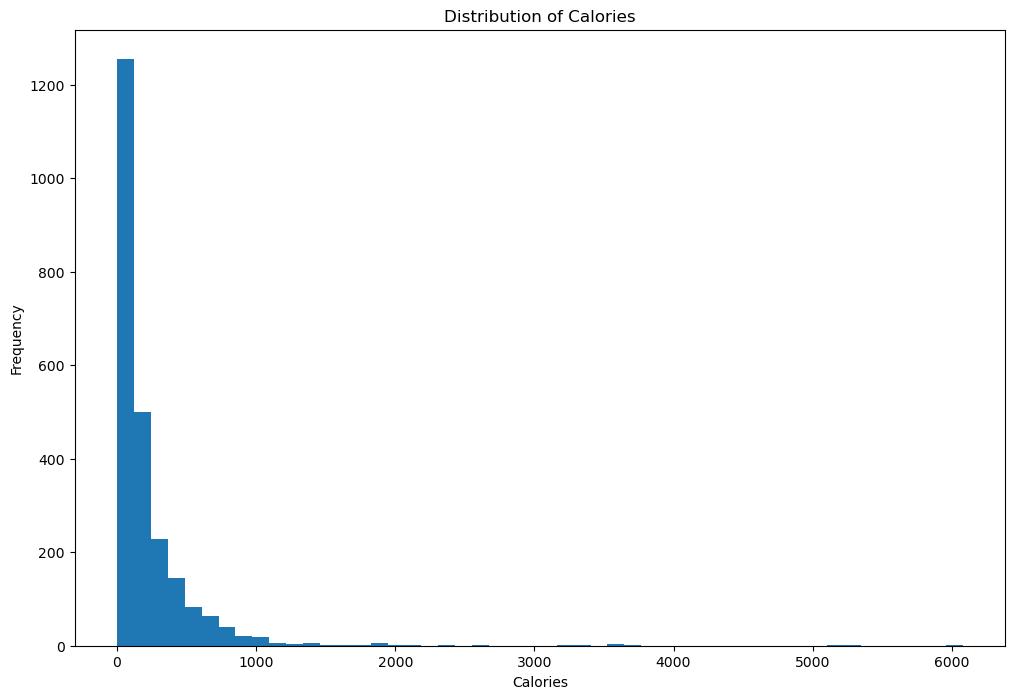

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.hist(data_compilada['caloric_value'], bins=50)
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.title('Distribution of Calories')
plt.show()

## Gracfica de la Propagacion de la Proteina en las diferentes comidas

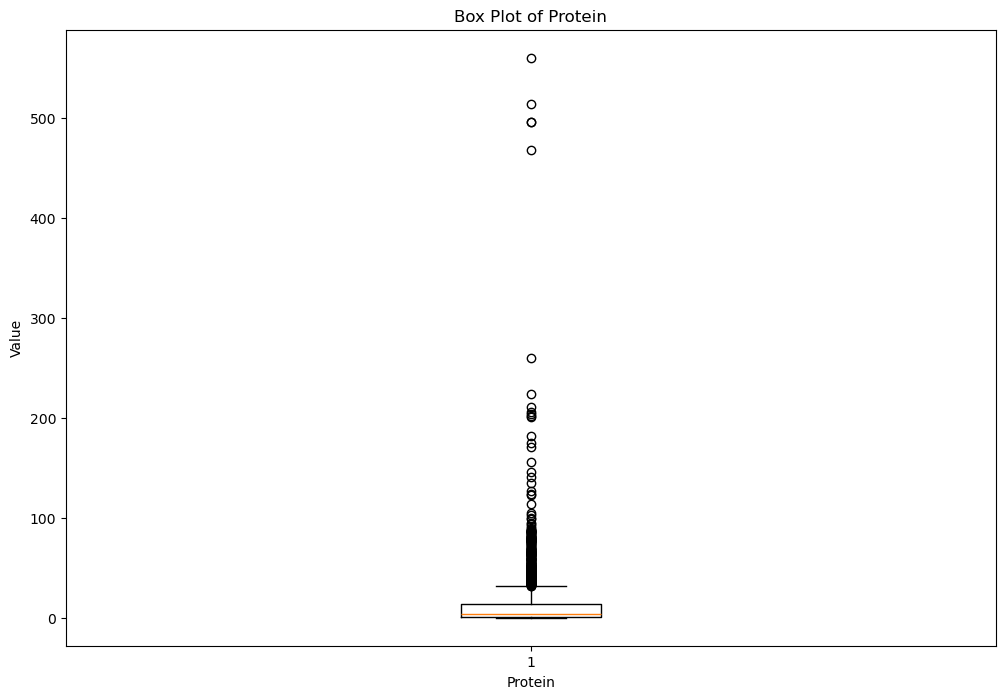

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.boxplot(data_compilada['protein'])
plt.xlabel('Protein')
plt.ylabel('Value')
plt.title('Box Plot of Protein')
plt.show()

## Grafica de la relacion entre Grasas y Azucares en las comidas

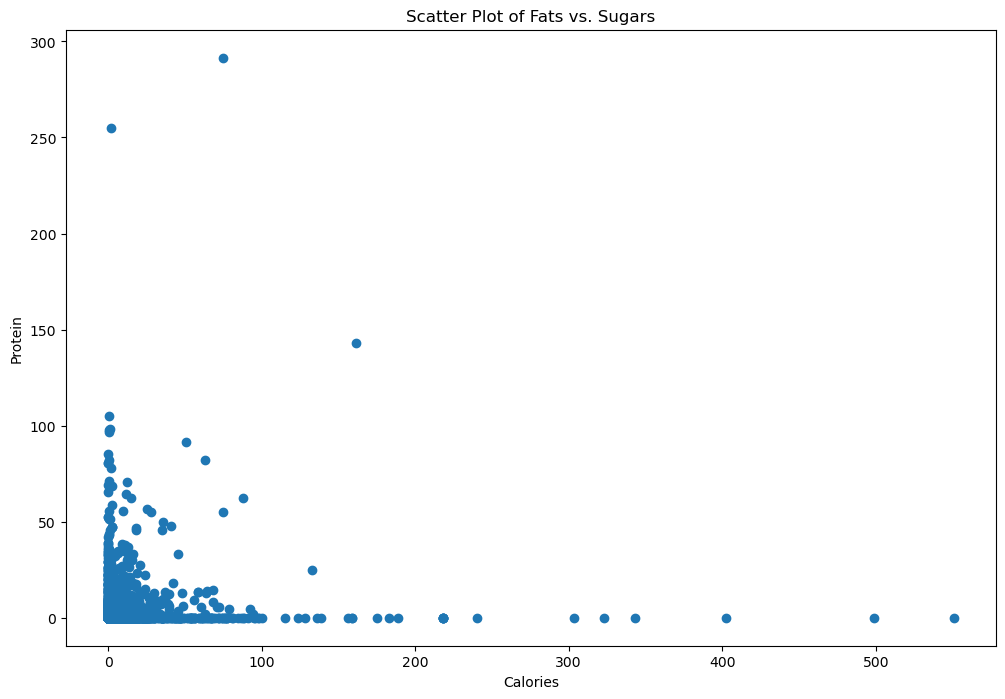

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.scatter(data_compilada['fat'], data_compilada['sugars'])
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title('Scatter Plot of Fats vs. Sugars')
plt.show()

In [37]:
# Obtener el directorio actual de trabajo
directorio_actual = os.getcwd()

# Ruta del archivo en el directorio actual
ruta_archivo = os.path.join(directorio_actual, "data_compilada.csv")

# Guardar el dataframe en un archivo CSV, sustituyendo si ya existe
data_compilada.to_csv(ruta_archivo, index=False)

print(f"Archivo guardado en {ruta_archivo}")

Archivo guardado en c:\Users\Sora\Desktop\Clove\proyecto_III\EDA\data_compilada.csv


## Machine Learning
Se calculan las distancias entre cada elemento con el modelo NearestNeighbour para luego realizar la recomendacion con el modelo k-nn

In [38]:
## NearestNeigbours
X = data_compilada.drop(['food', 'saturated_fats',
       'monounsaturated_fats', 'polyunsaturated_fats',
       'dietary_fiber', 'cholesterol', 'sodium', 'water',
       'vitamin_a', 'vitamin_b1', 'vitamin_b11', 'vitamin_b12', 'vitamin_b2',
       'vitamin_b3', 'vitamin_b5', 'vitamin_b6', 'vitamin_c', 'vitamin_d',
       'vitamin_e', 'vitamin_k', 'calcium', 'copper', 'iron', 'magnesium',
       'manganese', 'phosphorus', 'potassium', 'selenium', 'zinc',
       'nutrition_density'], axis=1).values
food_names = data_compilada['food'].values

# Normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Entrenar el Modelo
nneigh = NearestNeighbors(metric='cosine', algorithm='brute')
nneigh.fit(X_scaled)

# Guardar el Modelo
joblib.dump(nneigh, 'nearest_neighbors_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

### Realizar recomendaciones usando el model KNN

In [39]:

# Cargar el modelo y el scaler
nneigh = joblib.load('nearest_neighbors_model.pkl')
scaler = joblib.load('scaler.pkl')

# Valores de entrada (caloric_value', 'fat',  'carbohydrates', 'protein', 'sugars')
input_values = np.array([[10, 5, 20, 3, 23]])

# Normalizar los valores de entrada
input_scaled = scaler.transform(input_values)

# Encontrar los 5 vecinos más cercanos
distances, indices = nneigh.kneighbors(input_scaled, n_neighbors=5)

# Obtener los nombres de los alimentos recomendados
recommended_foods = food_names[indices[0]]

print("Alimentos recomendados:", recommended_foods)


Alimentos recomendados: ['vegetable chicken soup' 'cottage cheese nonfat'
 'soy proteins concentrate' 'cottonseed flour low fat'
 'sesame flour low fat']


In [40]:
### caloric_value', 'fat',  'carbohydrates', 'protein', 'sugars',